<a href="https://colab.research.google.com/github/umakanthreddy/Umakanth/blob/master/finding%20bluecellcount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Umakanth Reddy Kunam - 101132193**

**Computer Vision – CS 752**

**Project - 1 : the total number of blue cells in the provided
image**

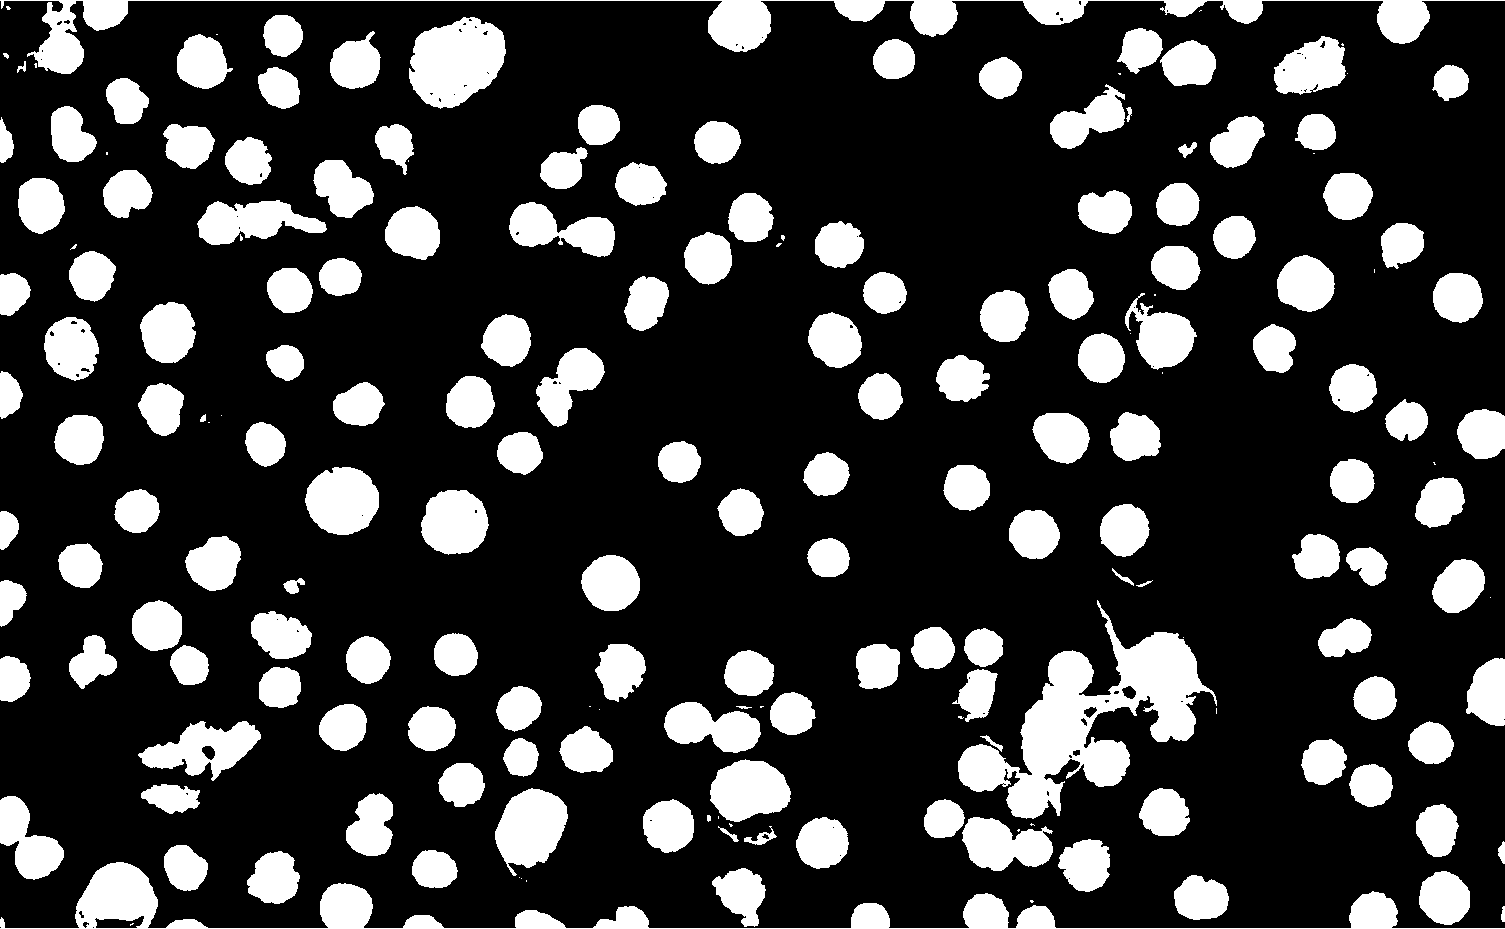

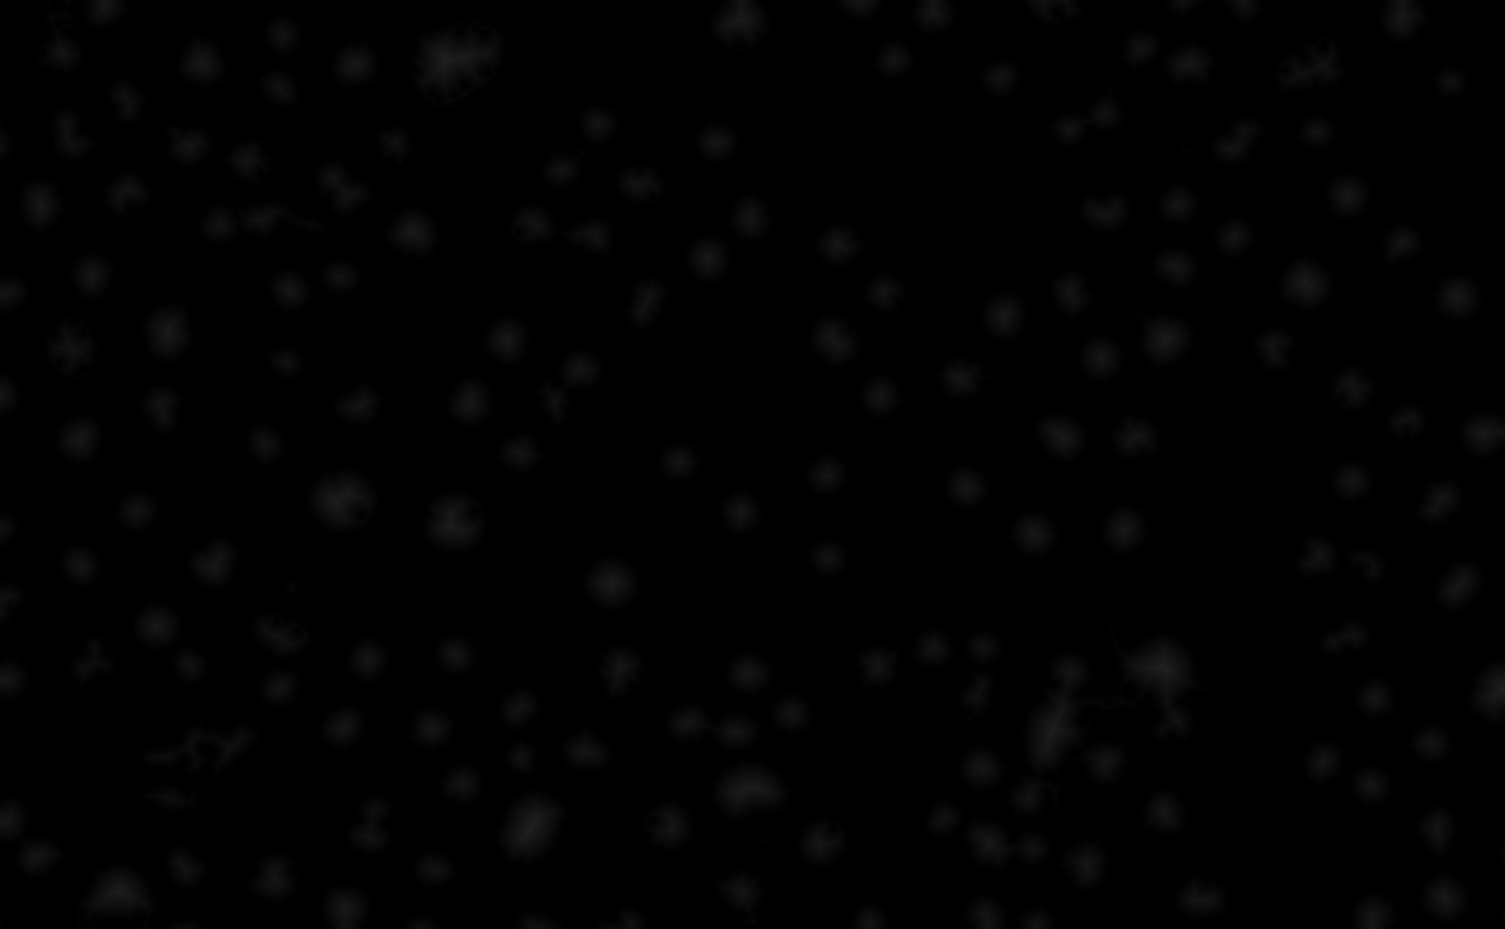

/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


 blue cells found 174 


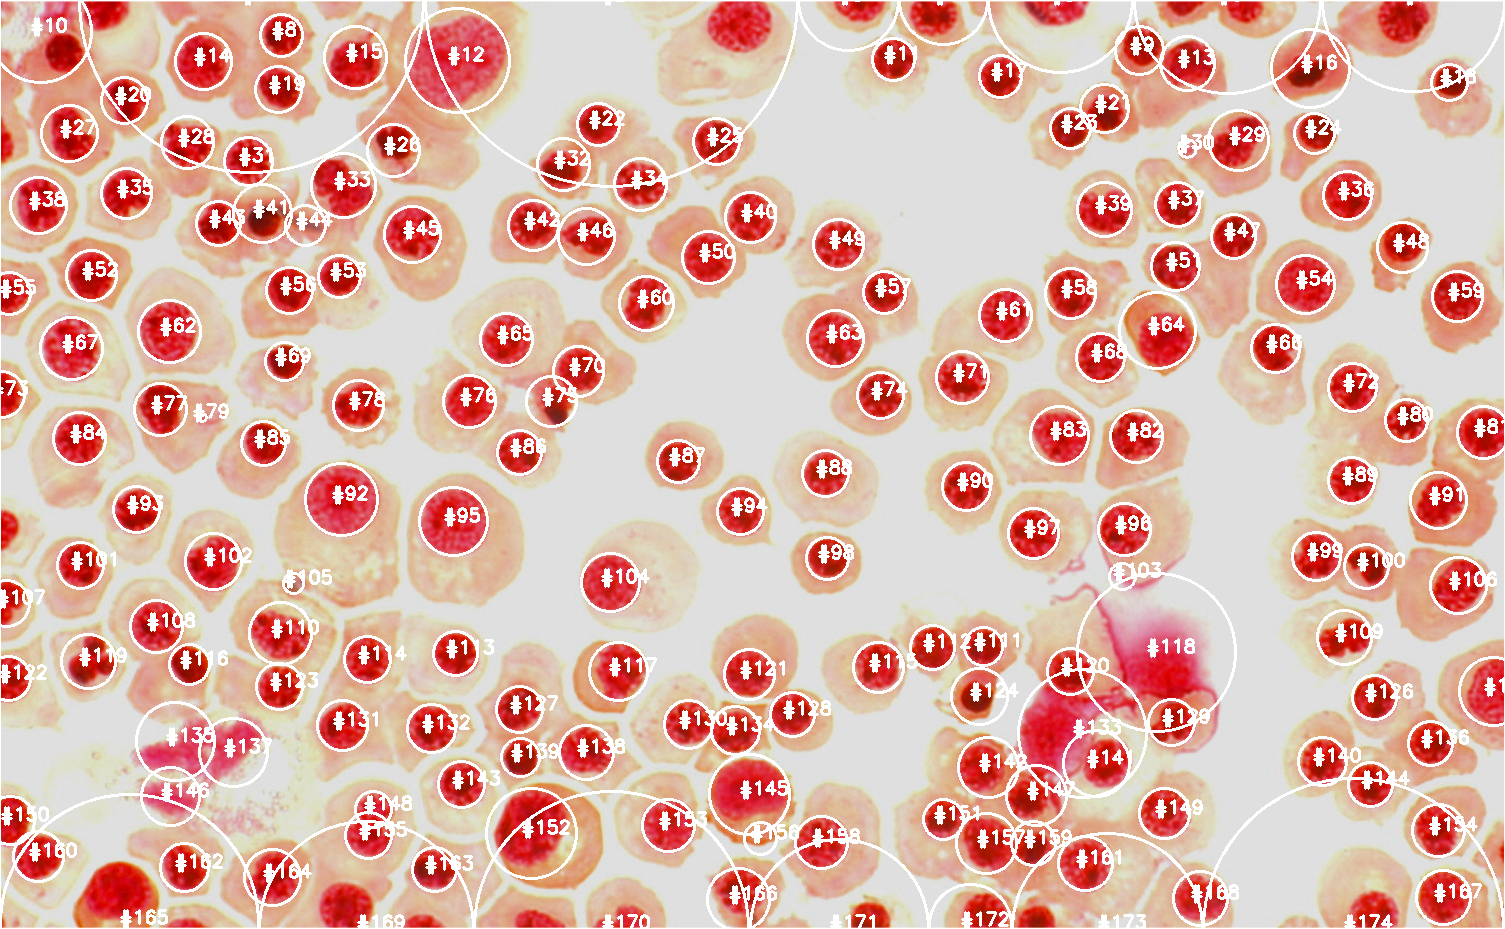

-1

In [17]:
import cv2
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import numpy as np
import imutils
from skimage import io
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow

image = io.imread("/content/RBC-stained.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

cv2_imshow(thresh)


D = ndimage.distance_transform_edt(thresh)
localMax = peak_local_max(D, indices=False, min_distance=20,
    labels=thresh)
cv2_imshow(D)

markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print(" blue cells found {} ".format(len(np.unique(labels)) -1))

for label in np.unique(labels):
    
    if label == 0:
        continue
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    ((x, y), r) = cv2.minEnclosingCircle(c)

    cv2.circle(image, (int(x), int(y)), int(r), (0, 255, 0), 2)
    cv2.putText(image, "#{}".format(label), (int(x) - 10, int(y)),
    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    cv2_imshow(image)
    cv2.waitKey(0)